# Primer intento: Minimize (esto es local NO SIRVE)

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sympy import *
from scipy.optimize import fsolve
import math
from matplotlib.colors import LogNorm
from numpy import genfromtxt
import pandas as pd

plt.rcParams['axes.grid'] = False
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({"font.size": 15, "font.family": "serif"})

In [2]:
def f(x):
    return np.sin(x)
minimize(f, 0.1)

      fun: -0.9999999999999964
 hess_inv: array([[1.00005774]])
      jac: array([9.68575478e-08])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-1.57079624])

In [6]:
def e0phi(lamb1, lamb2, lamb3):
    return 1/2*(2*lamb1 + lamb2)

def e1phi(lamb1, lamb2, lamb3):
    return 1/2*(2*lamb1 - lamb2)

def e2phi(lamb1, lamb2, lamb3):
    return 1/2*(-2*lamb1 + lamb3)

def e3phi(lamb1, lamb2, lamb3):
    return 1/2*(-2*lamb1 - lamb3)


e0t = 1/2*3
e1t = 1/2*1
e2t = 1/2*(-1)
e3t = 1/2*(-3)

e0AdS = complex(0, e0t)
e1AdS = complex(0, e1t)
e2AdS = complex(0, e2t)
e3AdS = complex(0, e3t)


In [101]:
def Qn(n, lamb1, lamb2, lamb3):
    return 1/n*(e0phi(lamb1, lamb2, lamb3)**n + e1phi(lamb1, lamb2, lamb3)**n + e2phi(lamb1, lamb2, lamb3)**n + e3phi(lamb1, lamb2, lamb3)**n)

def QnAdS(n):
    return 1/n*(e0AdS**n + e1AdS**n + e2AdS**n + e3AdS**n)

def S(lamb1, lamb2, lamb3):
    return e0phi(lamb1, lamb2, lamb3)*e0t + e1phi(lamb1, lamb2, lamb3)*e1t + e2phi(lamb1, lamb2, lamb3)*e2t + e3phi(lamb1, lamb2, lamb3)*e3t

def Gamma(lambs, mu3, mu4):
    lamb1, lamb2, lamb3 = lambs
    return np.real(5*(Qn(2, lamb1, lamb2, lamb3) - QnAdS(2)) + mu3*(Qn(3, lamb1, lamb2, lamb3) - QnAdS(3)) + mu4*(Qn(4, lamb1, lamb2, lamb3) - QnAdS(4)))

In [104]:
def dQdlambda(lambs):
    lamb1, lamb2, lamb3 = lambs
    return 1/32*lamb2*lamb3*(4*lamb1 + lamb2 + lamb3)*(4*lamb1 - lamb2 + lamb3)*(4*lamb1 + lamb2 - lamb3)*(4*lamb1 - lamb2 - lamb3)

def const_real(lambs):
    lamb1, lamb2, lamb3 = lambs
    return np.sum(np.iscomplex(lamb1)) + np.sum(np.iscomplex(lamb2)) + np.sum(np.iscomplex(lamb3))


bnds = ((0, None), (0, None), (0, None))
cons = {'type':'ineq', 'fun':dQdlambda}

mu30 = 0.1
mu3f = 4*np.pi
mu40 = 0.1
mu4f = 2*np.pi**2/5
n = 100
mu3list = np.linspace(mu30, mu3f, n)
mu4list = np.linspace(mu40, mu4f, n)

Q2_array = np.zeros((n, n))

for y in range(len(mu4list)):
    for x in range(len(mu3list)):
        res = minimize(Gamma, (0.2, 0.2, 0.2), args=(mu3list[x], mu4list[y]), bounds=bnds, constraints=cons)
        lamb1 = res.x[0]
        lamb2 = res.x[1]
        lamb3 = res.x[2]
        #print(res.x)
        #print(res)
        #lamb1, lamb2, lamb3 =  res
        Q2_array[(n-1) - y, x] = np.log(2*lamb1**2 + 1/4*lamb2**2+1/4*lamb3**2)


<ipython-input-104-24ff21bb8e81>:32: RuntimeWarning: divide by zero encountered in log
  Q2_array[(n-1) - y, x] = np.log(2*lamb1**2 + 1/4*lamb2**2+1/4*lamb3**2)


In [100]:
Gamma((1,1,1),1,1)

(25+0j)

In [20]:
def D1Gamma(lamb1, lamb2, lamb3, mu3, mu4):
    return -4 + 20*lamb1 + 1/2*(lamb2**2 - lamb3**2)*mu3 + 1/32*(128*lamb1**3 + 48*lamb1*(lamb2**2 + lamb3**2))*mu4

def D2Gamma(lamb1, lamb2, lamb3, mu3, mu4):
    return -(1/2) + 5*lamb2/2 + lamb1*lamb2*mu3 + 1/32*(48*lamb1**2*lamb2 + 4*lamb2**3)*mu4

def D3Gamma(lamb1, lamb2, lamb3, mu3, mu4):
    return -(1/2) + 5*lamb3/2 - lamb1*lamb3*mu3 + 1/32*(48*lamb1**2*lamb3 + 4*lamb3**3)*mu4

In [91]:
def equations(x, mu3, mu4):
    lamb1, lamb2, lamb3 = x
    return (D1Gamma(lamb1, lamb2, lamb3, mu3, mu4), D2Gamma(lamb1, lamb2, lamb3, mu3, mu4), D3Gamma(lamb1, lamb2, lamb3, mu3, mu4))






#lamb1, lamb2, lamb3 =  fsolve(equations, (1, 1, 1), args=(1, 1))

In [81]:
Q2_array[9, 0]=1
Q2_array

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [65]:
len(mu3list)

50

In [92]:



for y in range(len(mu4list)):
    for x in range(len(mu3list)):
        lamb1, lamb2, lamb3 =  fsolve(equations, (1, 1, 1), args=(mu3list[x], mu4list[y]), xtol=1.49012e-10)
        Q2_array[(n-1) - y, x] = np.log(2*lamb1**2 + 1/4*lamb2**2+1/4*lamb3**2)
        #print(Q2_array)

/Users/javier/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/javier/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


In [63]:
Q2_array

array([[-2.30428603, -2.31517685, -2.3212319 , ..., -2.50857763,
        -2.5109971 , -2.51165356],
       [-2.24966072, -2.25342294, -2.26656604, ..., -2.48060537,
        -2.48339587, -2.48428284],
       [-2.18588691, -2.19515184, -2.20758713, ..., -2.45224873,
        -2.45576685, -2.45830642],
       ...,
       [-2.41193555, -2.41001186, -2.40807832, ..., -2.30862183,
        -2.306071  , -2.30350176],
       [-2.41291111, -2.41099545, -2.40907005, ..., -2.31014241,
        -2.30760849, -2.3050565 ],
       [-2.41337016, -2.41145828, -2.4095367 , ..., -2.31085695,
        -2.30833096, -2.30578703]])

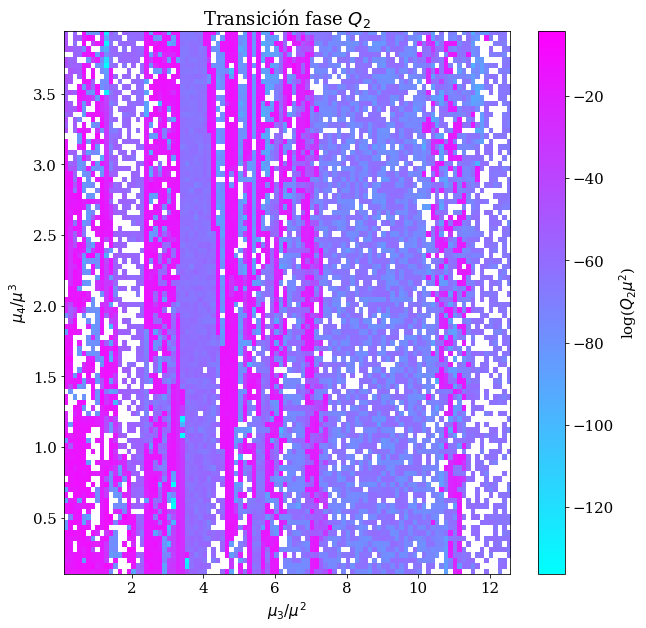

In [105]:
fig, ax = plt.subplots(figsize=(10,10))

c = ax.imshow(Q2_array, cmap ='cool', interpolation ='nearest', origin ='lower', extent =[mu30, mu3f, mu40, mu4f],aspect='auto')
ax.set_title("Transición fase $Q_2$")
ax.set_xlabel("$\mu_3/\mu^2$")
ax.set_ylabel("$\mu_4/\mu^3$", rotation=90)

fig.colorbar(c, ax=ax, label='log($Q_2\mu^2$)')

In [31]:
res = minimize(Gamma, args=(6, 9))
res.x

TypeError: minimize() missing 1 required positional argument: 'x0'

In [26]:
Gamma((0,0,0),1,1)

(9.9375+0j)

In [16]:
f = lambdify((x,z), yprime, 'numpy')
f(4,2)

10

In [ ]:
-4 + 20*lamb1 + 1/2 (lamb2**2 - lamb3**2)*mu3 + 1/32 (128*lamb1^3 + 48*lamb1 (lamb2**2 + lamb3**2))*mu4

# Segundo intento

In [5]:
params = (2, 3, 7, 8, 9, 10, 44, -1, 2, 26, 1, -2, 0.5)
def f1(z, *params):
    x, y = z
    a, b, c, d, e, f, g, h, i, j, k, l, scale = params
    return (a * x**2 + b * x * y + c * y**2 + d*x + e*y + f)

def f2(z, *params):
    x, y = z
    a, b, c, d, e, f, g, h, i, j, k, l, scale = params
    return (-g*np.exp(-((x-h)**2 + (y-i)**2) / scale))

def f3(z, *params):
    x, y = z
    a, b, c, d, e, f, g, h, i, j, k, l, scale = params
    return (-j*np.exp(-((x-k)**2 + (y-l)**2) / scale))

def f(z, *params):
    return f1(z, *params) + f2(z, *params) + f3(z, *params)

In [ ]:
def f(z, list):
    x, y, r = z
    a = list
    return x^2+y^3+a*r^4

In [7]:
import numpy as np
rranges = (slice(-4, 4, 0.25), slice(-4, 4, 0.25))
from scipy import optimize
resbrute = optimize.brute(f, rranges, args=params, full_output=True,
                          finish=optimize.fmin)
resbrute  # global minimum

(array([-1.05665192,  1.80834843]),
 -3.4085818767996527,
 array([[[-4.  , -4.  , -4.  , ..., -4.  , -4.  , -4.  ],
         [-3.75, -3.75, -3.75, ..., -3.75, -3.75, -3.75],
         [-3.5 , -3.5 , -3.5 , ..., -3.5 , -3.5 , -3.5 ],
         ...,
         [ 3.25,  3.25,  3.25, ...,  3.25,  3.25,  3.25],
         [ 3.5 ,  3.5 ,  3.5 , ...,  3.5 ,  3.5 ,  3.5 ],
         [ 3.75,  3.75,  3.75, ...,  3.75,  3.75,  3.75]],
 
        [[-4.  , -3.75, -3.5 , ...,  3.25,  3.5 ,  3.75],
         [-4.  , -3.75, -3.5 , ...,  3.25,  3.5 ,  3.75],
         [-4.  , -3.75, -3.5 , ...,  3.25,  3.5 ,  3.75],
         ...,
         [-4.  , -3.75, -3.5 , ...,  3.25,  3.5 ,  3.75],
         [-4.  , -3.75, -3.5 , ...,  3.25,  3.5 ,  3.75],
         [-4.  , -3.75, -3.5 , ...,  3.25,  3.5 ,  3.75]]]),
 array([[134.        , 119.6875    , 106.25      , ...,  74.18749997,
          85.24999999,  97.1875    ],
        [129.125     , 115.        , 101.75      , ...,  74.74999948,
          85.99999987,  98.1249999

# Tercer intento: shgo

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sympy import *
from scipy.optimize import fsolve
import math
from matplotlib.colors import LogNorm
from numpy import genfromtxt
import pandas as pd

plt.rcParams['axes.grid'] = False
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({"font.size": 15, "font.family": "serif"})

In [58]:
def e0phi(lamb1, lamb2, lamb3):
    return 1/2*(2*lamb1 + lamb2)

def e1phi(lamb1, lamb2, lamb3):
    return 1/2*(2*lamb1 - lamb2)

def e2phi(lamb1, lamb2, lamb3):
    return 1/2*(-2*lamb1 + lamb3)

def e3phi(lamb1, lamb2, lamb3):
    return 1/2*(-2*lamb1 - lamb3)


e0t = 1/2*3
e1t = 1/2*1
e2t = 1/2*(-1)
e3t = 1/2*(-3)

e0AdS = complex(0, e0t)
e1AdS = complex(0, e1t)
e2AdS = complex(0, e2t)
e3AdS = complex(0, e3t)

"""
def Qn(n, lamb1, lamb2, lamb3):
    return 1/n*(e0phi(lamb1, lamb2, lamb3)**n + e1phi(lamb1, lamb2, lamb3)**n + e2phi(lamb1, lamb2, lamb3)**n + e3phi(lamb1, lamb2, lamb3)**n)

def QnAdS(n):
    return 1/n*(e0AdS**n + e1AdS**n + e2AdS**n + e3AdS**n)

def S(lamb1, lamb2, lamb3):
    return e0phi(lamb1, lamb2, lamb3)*e0t + e1phi(lamb1, lamb2, lamb3)*e1t + e2phi(lamb1, lamb2, lamb3)*e2t + e3phi(lamb1, lamb2, lamb3)*e3t
"""

def Gamma(lambs, *mus):
    mu3 = mus[0]
    mu4 = mus[1]
    lamb1 = lambs[0]
    lamb2 = lambs[1]
    lamb3 = lambs[2]
    #print("Lambda1: ", lamb1,"Lambda2: ", lamb2,"Lambda3: ", lamb3, "mu3: ",mu3,"mu4: ",mu4)
    return np.real(1/2*(-8*lamb1 - lamb2 - lamb3) + 5*(5/2 + 1/4*(8*lamb1**2 + lamb2**2 + lamb3**2)) + 1/2*lamb1*(lamb2**2 - lamb3**2)*mu3 + (-(41/16) + 1/32*(32*lamb1**4 + lamb2**4 + lamb3**4 + 24*lamb1**2*(lamb2**2 + lamb3**2)))*mu4)

In [79]:
"""
def dQdlambda(lambs):
    lamb1, lamb2, lamb3 = lambs
    return 1/32*lamb2*lamb3*(4*lamb1 + lamb2 + lamb3)*(4*lamb1 - lamb2 + lamb3)*(4*lamb1 + lamb2 - lamb3)*(4*lamb1 - lamb2 - lamb3)
"""

def g1(lambs):
    lamb1 = lambs[0]
    lamb2 = lambs[1]
    return lamb2 #>0

def g2(lambs):
    lamb3 = lambs[2]
    return lamb3 #>0

def g3(lambs):
    lamb1 = lambs[0]
    lamb2 = lambs[1]
    lamb3 = lambs[2]
    return 4*lamb1 + lamb2 + lamb3 #>0

def g4(lambs):
    lamb1 = lambs[0]
    lamb2 = lambs[1]
    lamb3 = lambs[2]
    return 4*lamb1 - lamb2 + lamb3 #>0

def g5(lambs):
    lamb1 = lambs[0]
    lamb2 = lambs[1]
    lamb3 = lambs[2]
    return 4*lamb1 + lamb2 - lamb3 #>0

def g6(lambs):
    lamb1 = lambs[0]
    lamb2 = lambs[1]
    lamb3 = lambs[2]
    return 4*lamb1 - lamb2 - lamb3 #>0

def eq1(lambs, *mus):
    mu3 = mus[0]
    mu4 = mus[1]
    lamb1 = 5.02484385151935
    lamb2 = 0.01657050307220192
    lamb3 = lambs[2]
    return -4 + 20*lamb1 + 1/2*(lamb2**2 - lamb3**2)*mu3 + 1/32*(128*lamb1**3 + 48*lamb1*(lamb2**2 + lamb3**2))*mu4 # = 0

def eq2(lambs, *mus):
    mu3 = mus[0]
    mu4 = mus[1]
    lamb1 = 5.02484385151935
    lamb2 = 0.01657050307220192
    lamb3 = lambs[2]
    return -(1/2) + (5*lamb2)/2 + lamb1*lamb2*mu3 + 1/32*(48*lamb1**2*lamb2 + 4*lamb2**3)*mu4 # = 0

def eq3(lambs, *mus):
    mu3 = mus[0]
    mu4 = mus[1]
    lamb1 = 5.02484385151935
    lamb2 = 0.01657050307220192
    lamb3 = lambs[2]
    return -(1/2) + (5*lamb3)/2 - lamb1*lamb3*mu3 + 1/32*(48*lamb1**2*lamb3 + 4*lamb3**3)*mu4 # = 0

"""
def const_real(lambs):
    lamb1, lamb2, lamb3 = lambs
    return np.sum(np.iscomplex(lamb1)) + np.sum(np.iscomplex(lamb2)) + np.sum(np.iscomplex(lamb3))
"""


#bnds = ((0, None), (0, None), (0, None))
cons = ({'type':'ineq', 'fun': g1},
        {'type':'ineq', 'fun': g2},
        {'type':'ineq', 'fun': g3},
        {'type':'ineq', 'fun': g4},
        {'type':'ineq', 'fun': g5},
        {'type':'ineq', 'fun': g6})


mu30 = 0.2
mu3f = 4*np.pi
#mu3f = 6
mu40 = 0.2
mu4f = 2*np.pi**2/5
#mu4f = 1
n = 100
mu3list = np.linspace(mu30, mu3f, n)
mu4list = np.linspace(mu40, mu4f, n)

Q2_array = np.zeros((n, n))
bounds = [(None, None), (None, None),(None, None)]

for y in range(len(mu4list)):
    for x in range(len(mu3list)):
        mus = (mu3list[x], mu4list[y])
        res = shgo(Gamma, bounds=bounds, args=mus, constraints=cons)
        #res = minimize(Gamma, (0.2, 0.2, 0.2), args=(mu3list[x], mu4list[y]), bounds=bnds, constraints=cons)
        lamb1 = res.x[0]
        lamb2 = res.x[1]
        lamb3 = res.x[2]
        #print(res.x)
        #print(res)
        #lamb1, lamb2, lamb3 =  res
        Q2_array[(n-1) - y, x] = np.log(2*lamb1**2 + 1/4*lamb2**2 + 1/4*lamb3**2)



IndexError: tuple index out of range

In [92]:
# NO BORRAR


def g1(lambs):
    lamb1 = lambs[0]
    lamb2 = lambs[1]
    return lamb2 #>0

def g2(lambs):
    lamb3 = lambs[2]
    return lamb3 #>0

def g3(lambs):
    lamb1 = lambs[0]
    lamb2 = lambs[1]
    lamb3 = lambs[2]
    return 4*lamb1 + lamb2 + lamb3 #>0

def g4(lambs):
    lamb1 = lambs[0]
    lamb2 = lambs[1]
    lamb3 = lambs[2]
    return 4*lamb1 - lamb2 + lamb3 #>0

def g5(lambs):
    lamb1 = lambs[0]
    lamb2 = lambs[1]
    lamb3 = lambs[2]
    return 4*lamb1 + lamb2 - lamb3 #>0

def g6(lambs):
    lamb1 = lambs[0]
    lamb2 = lambs[1]
    lamb3 = lambs[2]
    return 4*lamb1 - lamb2 - lamb3 #>0

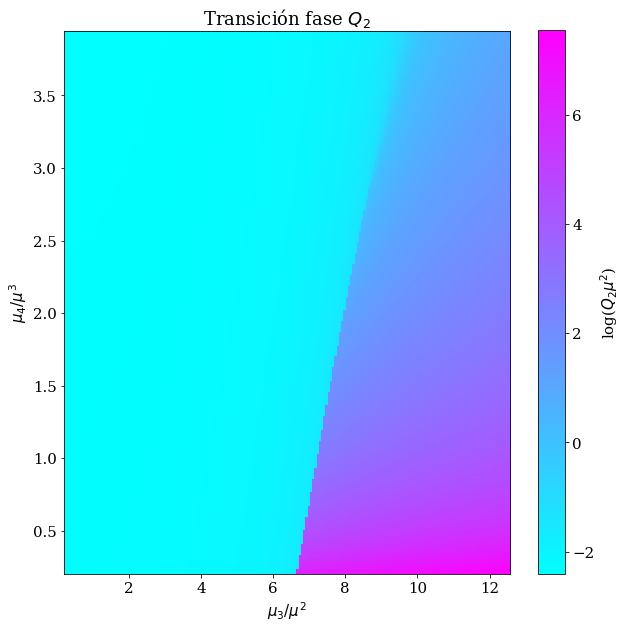

In [63]:
fig, ax = plt.subplots(figsize=(10,10))

c = ax.imshow(Q2_array, cmap ='cool', interpolation ='nearest', origin ='upper', extent =[mu30, mu3f, mu40, mu4f],aspect='auto')
ax.set_title("Transición fase $Q_2$")
ax.set_xlabel("$\mu_3/\mu^2$")
ax.set_ylabel("$\mu_4/\mu^3$", rotation=90)

fig.colorbar(c, ax=ax, label='log($Q_2\mu^2$)')

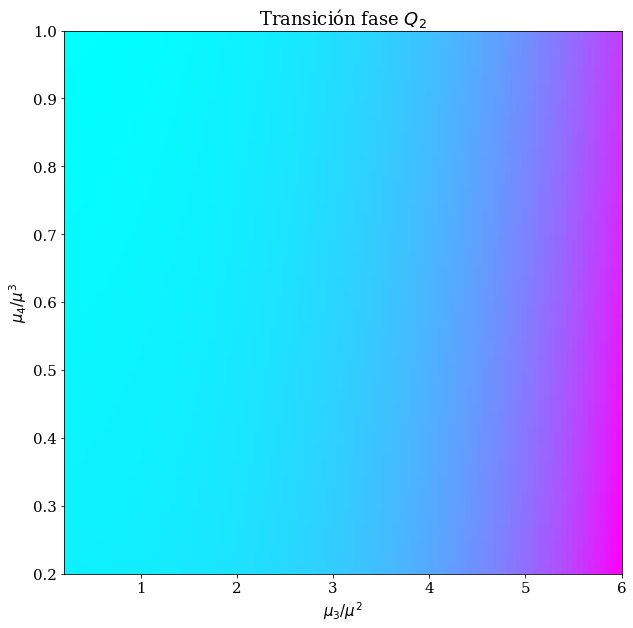

In [65]:
fig2, ax2 = plt.subplots(figsize=(10,10))

c = ax2.imshow(Q2_array, cmap ='cool', interpolation ='nearest', origin ='upper', extent =[mu30, mu3f, mu40, mu4f],aspect='auto')
ax2.set_title("Transición fase $Q_2$")
ax2.set_xlabel("$\mu_3/\mu^2$")
ax2.set_ylabel("$\mu_4/\mu^3$", rotation=90)

fig2.colorbar(c, ax=ax, label='log($Q_2\mu^2$)')

In [97]:
#mus_1 = (2, 3)
#bounds = [(-100, 100),(-100, 100)]
mus=(4,0.2)

cons1 = ({'type':'ineq', 'fun': g1},
        {'type':'ineq', 'fun': g2},
        {'type':'ineq', 'fun': g3},
        {'type':'ineq', 'fun': g4},
        {'type':'ineq', 'fun': g5},
        {'type':'ineq', 'fun': g6})

def Gamma(lambs, *mus):
    mu3 = mus[0]
    mu4 = mus[1]
    lamb1 = lambs[0]
    lamb2 = lambs[1]
    lamb3 = lambs[2]
    #print("Lambda1: ", lamb1,"Lambda2: ", lamb2,"Lambda3: ", lamb3, "mu3: ",mu3,"mu4: ",mu4)
    return np.real(1/2*(-8*lamb1 - lamb2 - lamb3) + 5*(5/2 + 1/4*(8*lamb1**2 + lamb2**2 + lamb3**2)) + 1/2*lamb1*(lamb2**2 - lamb3**2)*mu3 + (-(41/16) + 1/32*(32*lamb1**4 + lamb2**4 + lamb3**4 + 24*lamb1**2*(lamb2**2 + lamb3**2)))*mu4)

res = shgo(Gamma, bounds=bounds, args=mus, constraints=cons1)

In [98]:
res

     fun: 11.476788939597547
    funl: array([11.47678894])
 message: 'Optimization terminated successfully.'
    nfev: 34
     nit: 2
   nlfev: 32
   nlhev: 0
   nljev: 7
 success: True
       x: array([0.20580237, 0.14985861, 0.29556401])
      xl: array([[0.20580237, 0.14985861, 0.29556401]])

In [99]:
#bnds = ((0, None), (0, None), (0, None))
cons = ({'type':'ineq', 'fun': g1},
        {'type':'ineq', 'fun': g2},
        {'type':'ineq', 'fun': g3},
        {'type':'ineq', 'fun': g4},
        {'type':'ineq', 'fun': g5},
        {'type':'ineq', 'fun': g6})


mu30 = 0.2
mu3f = 4*np.pi
#mu3f = 6
mu40 = 0.2
mu4f = 2*np.pi**2/5
#mu4f = 1
n = 100
mu3list = np.linspace(mu30, mu3f, n)
mu4list = np.linspace(mu40, mu4f, n)

Q2_array = np.zeros((n, n))
bounds = [(-50,50), (-50,50),(-50,50)]

for y in range(len(mu4list)):
    for x in range(len(mu3list)):
        mus = (mu3list[x], mu4list[y])
        res = shgo(Gamma, bounds=bounds, args=mus, constraints=cons)
        #res = minimize(Gamma, (0.2, 0.2, 0.2), args=(mu3list[x], mu4list[y]), bounds=bnds, constraints=cons)
        lamb1 = res.x[0]
        lamb2 = res.x[1]
        lamb3 = res.x[2]
        #print(res.x)
        #print(res)
        #lamb1, lamb2, lamb3 =  res
        Q2_array[(n-1) - y, x] = np.log(2*lamb1**2 + 1/4*lamb2**2 + 1/4*lamb3**2)

/Users/javier/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


In [127]:
bounds2 = [(0,25),(0,25),(10,25)]
res = shgo(Gamma, bounds=bounds2, args=(4,0.2), constraints=cons)
res

     fun: -643.0788640651608
    funl: array([-643.07886407])
 message: 'Optimization terminated successfully.'
    nfev: 59
     nit: 2
   nlfev: 54
   nlhev: 0
   nljev: 12
 success: True
       x: array([5.02484385e+00, 1.65696285e-02, 2.00495358e+01])
      xl: array([[5.02484385e+00, 1.65696285e-02, 2.00495358e+01]])

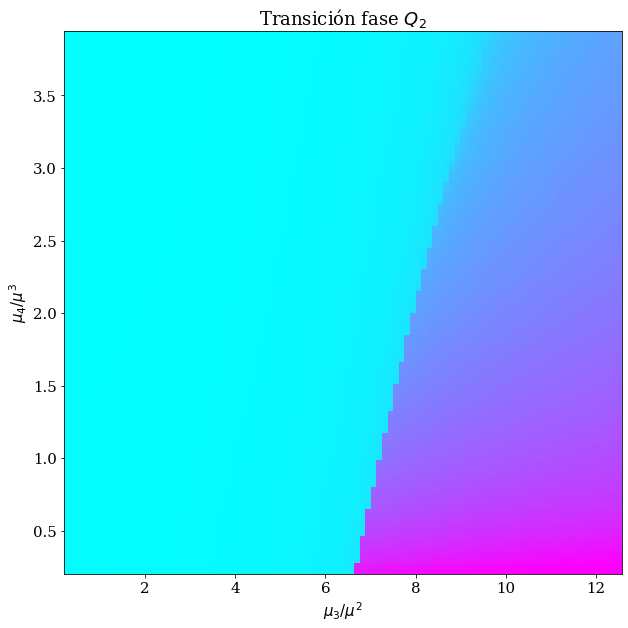

In [100]:
fig3, ax3 = plt.subplots(figsize=(10,10))

c = ax3.imshow(Q2_array, cmap ='cool', interpolation ='nearest', origin ='upper', extent =[mu30, mu3f, mu40, mu4f],aspect='auto')
ax3.set_title("Transición fase $Q_2$")
ax3.set_xlabel("$\mu_3/\mu^2$")
ax3.set_ylabel("$\mu_4/\mu^3$", rotation=90)

fig3.colorbar(c, ax=ax, label='log($Q_2\mu^2$)')

## NO funciono lo anterior


In [74]:
from scipy.optimize import rosen, differential_evolution
bounds = [(0,2), (0, 2), (0, 2), (0, 2), (0, 2)]
result = differential_evolution(rosen, bounds, )
result.x, result.fun

(array([1., 1., 1., 1., 1.]), 0.0)

In [9]:
"""
from scipy.optimize import rosen, shgo

def f(x):  # (cattle-feed)
    return 24.55*x[0] + 26.75*x[1] + 39*x[2] + 40.50*x[3]

def g1(x):
    return 2.3*x[0] + 5.6*x[1] + 11.1*x[2] + 1.3*x[3] - 5  # >=0

def g2(x):
    return (12*x[0] + 11.9*x[1] +41.8*x[2] + 52.1*x[3] - 21
            - 1.645 * np.sqrt(0.28*x[0]**2 + 0.19*x[1]**2
                            + 20.5*x[2]**2 + 0.62*x[3]**2)
            ) # >=0

def h1(x):
    return x[0] + x[1] + x[2] + x[3] - 1  # == 0

cons = ({'type': 'ineq', 'fun': g1},
        {'type': 'ineq', 'fun': g2},
        {'type': 'eq', 'fun': h1})
bounds = [(0, 1.0),]*4
res = shgo(f, bounds, iters=3, constraints=cons)
"""

# Solver

In [120]:
from scipy.optimize import fsolve
from scipy import optimize

def eq123(lambs, *mus):
    mu3 = mus[0]
    mu4 = mus[1]
    lamb1 = lambs[0]
    lamb2 = lambs[1]
    lamb3 = lambs[2]
    D1 = -4 + 20*lamb1 + 1/2*(lamb2**2 - lamb3**2)*mu3 + 1/32*(128*lamb1**3 + 48*lamb1*(lamb2**2 + lamb3**2))*mu4
    D2 = -(1/2) + (5*lamb2)/2 + lamb1*lamb2*mu3 + 1/32*(48*lamb1**2*lamb2 + 4*lamb2**3)*mu4
    D3 = -(1/2) + (5*lamb3)/2 - lamb1*lamb3*mu3 + 1/32*(48*lamb1**2*lamb3 + 4*lamb3**3)*mu4
    return [D1,D2,D3]

mus = (4,0.2)
root = optimize.root(eq123, [1, 1, 1], args=mus, tol=1e-11)
root

    fjac: array([[-0.92300651, -0.03066285,  0.38356064],
       [ 0.01052042, -0.99845819, -0.05450287],
       [-0.38464048,  0.04627129, -0.921906  ]])
     fun: array([5.10702591e-15, 7.88605292e-15, 5.55111512e-16])
 message: 'The solution converged.'
    nfev: 21
     qtf: array([1.24013459e-11, 1.81133810e-11, 3.16097424e-12])
       r: array([-21.48427624,  -0.70301698,   7.17215203,  -5.15605004,
        -0.22425018,   2.46107507])
  status: 1
 success: True
       x: array([0.62810935, 0.0974463 , 2.20165849])

In [122]:
mu30 = 0.2
mu3f = 4*np.pi
#mu3f = 6
mu40 = 0.2
mu4f = 2*np.pi**2/5
#mu4f = 1
n = 100
mu3list = np.linspace(mu30, mu3f, n)
mu4list = np.linspace(mu40, mu4f, n)

Q2_array = np.zeros((n, n))
#bounds = [(-50,50), (-50,50),(-50,50)]

for y in range(len(mu4list)):
    for x in range(len(mu3list)):
        mus = (mu3list[x], mu4list[y])
        root = optimize.root(eq123, [1, 1, 1], args=mus, tol=1e-11)
        #res = shgo(Gamma, bounds=bounds, args=mus, constraints=cons)
        #res = minimize(Gamma, (0.2, 0.2, 0.2), args=(mu3list[x], mu4list[y]), bounds=bnds, constraints=cons)
        lamb1 = root.x[0]
        lamb2 = root.x[1]
        lamb3 = root.x[2]
        #print(res.x)
        #print(res)
        #lamb1, lamb2, lamb3 =  res
        Q2_array[(n-1) - y, x] = np.log(2*lamb1**2 + 1/4*lamb2**2 + 1/4*lamb3**2)

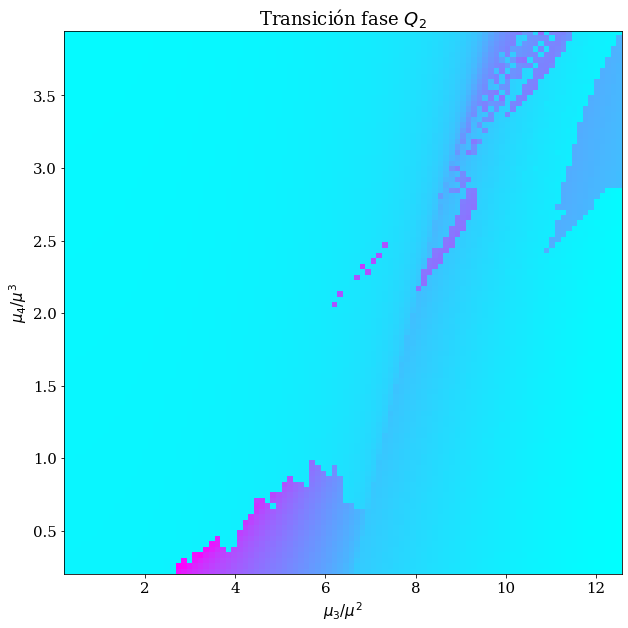

In [123]:
fig4, ax4 = plt.subplots(figsize=(10,10))

c = ax4.imshow(Q2_array, cmap ='cool', interpolation ='nearest', origin ='upper', extent =[mu30, mu3f, mu40, mu4f],aspect='auto')
ax4.set_title("Transición fase $Q_2$")
ax4.set_xlabel("$\mu_3/\mu^2$")
ax4.set_ylabel("$\mu_4/\mu^3$", rotation=90)

fig4.colorbar(c, ax=ax, label='log($Q_2\mu^2$)')

In [121]:
eq123(root.x, *mus)

[5.10702591327572e-15, 7.886052921790565e-15, 5.551115123125783e-16]

In [118]:
eq123([5.02484385151935, 0.01657050307220192, 20.049535575611994], *mus)

[-7.855760486563668e-11, 1.9065332645951116e-11, -1.9838353182421997e-11]